#Importing the libraries


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


#Loading the Dataset

In [6]:
df = pd.read_csv("kaggle_survey_2017_2021.csv")


/tmp/ipython-input-122284297.py:1: DtypeWarning: Columns (0,1,19,31,45,48,51,64,81,93,100,106,108,132,151,161,166,213,226,238,253,267,275,281,291) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("kaggle_survey_2017_2021.csv")


#Data Description

In [7]:
print("Shape of dataset:", df.shape)
print("\nColumns:")
print(df.columns.tolist())


Shape of dataset: (34109, 293)

Columns:
['-', 'Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5', 'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9', 'Q7_Part_10', 'Q7_Part_11', 'Q7_Part_12', 'Q7_OTHER', 'Q8', 'Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8', 'Q9_Part_9', 'Q9_Part_10', 'Q9_Part_12', 'Q9_OTHER', 'Q10_Part_1', 'Q10_Part_2', 'Q10_Part_3', 'Q10_Part_4', 'Q10_Part_5', 'Q10_Part_6', 'Q10_Part_7', 'Q10_Part_8', 'Q10_Part_9', 'Q10_Part_10', 'Q10_Part_11', 'Q10_Part_12', 'Q10_Part_16', 'Q10_OTHER', 'Q11', 'Q12new', 'Q12_Part_1', 'Q12_Part_2', 'Q12_Part_5', 'Q12_OTHER', 'Q13', 'Q14_Part_1', 'Q14_Part_2', 'Q14_Part_3', 'Q14_Part_4', 'Q14_Part_5', 'Q14_Part_6', 'Q14_Part_7', 'Q14_Part_8', 'Q14_Part_9', 'Q14_Part_10', 'Q14_Part_11', 'Q14_OTHER', 'Q15', 'Q16_Part_1', 'Q16_Part_2', 'Q16_Part_3', 'Q16_Part_4', 'Q16_Part_5', 'Q16_Part_6', 'Q16_Part_7', 'Q16_

In [8]:
df.head()


,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
4,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().mean() * 100).sort_values(ascending=False)

missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percent': missing_percent
})

print(missing_df.head(20))  # top 20 columns with most missing values


               Missing Values    Percent
Q38_B_Part_11           34108  99.997068
Q34_B_Part_16           34108  99.997068
Q10_Part_16             34108  99.997068
Q9_Part_12              34108  99.997068
Q7_Part_12              34108  99.997068
Q12new                  34108  99.997068
Q14_Part_11             34108  99.997068
Q19_Part_5              34108  99.997068
Q17_Part_11             34108  99.997068
Q32_B_Part_20           34108  99.997068
Q16_Part_17             34108  99.997068
Q12_Part_5              34108  99.997068
Q18_Part_6              34108  99.997068
Q27_B_Part_11           34108  99.997068
Q37_B_Part_7            34108  99.997068
Q40_Part_11             34108  99.997068
Q36_B_Part_7            34108  99.997068
Q34_A_Part_16           34108  99.997068
Q27_A_Part_11           34108  99.997068
Q32_A_Part_20           34108  99.997068


In [10]:
df.info()


df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34109 entries, 0 to 34108
Columns: 293 entries, - to Q38_B_OTHER
dtypes: object(293)
memory usage: 76.2+ MB


,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
count,34109,34109,34109,34109,34109,33911,33785,33712,28192,7017,...,1653,2071,827,761,5559,958,940,883,1,487
unique,4,6369,12,6,68,9,17,9,2,2,...,2,2,2,2,2,2,2,2,1,2
top,2021,484,25-29,Man,India,Masterâ€™s degree,Student,1-3 years,Python,R,...,Neptune.ai,Weights & Biases,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,Domino Model Monitor,"In the next 2 years, do you hope to become mor...",Other
freq,23926,52,6596,27019,9868,13303,8908,7874,28191,7016,...,1652,2070,826,760,5558,957,939,882,1,486


In [11]:
print("\nAge distribution:\n", df['Q1'].value_counts().head(10))
print("\nGender distribution:\n", df['Q2'].value_counts().head(10))
print("\nTop countries:\n", df['Q3'].value_counts().head(10))
print("\nTop roles:\n", df['Q5'].value_counts().head(10))



Age distribution:
 Q1
25-29    6596
18-21    6316
22-24    6253
30-34    4579
35-39    3270
40-44    2444
45-49    1783
50-54    1243
55-59     757
60-69     708
Name: count, dtype: int64

Gender distribution:
 Q2
Man                                       27019
Woman                                      6451
Prefer not to say                           466
Nonbinary                                   106
Prefer to self-describe                      66
What is your gender? - Selected Choice        1
Name: count, dtype: int64

Top countries:
 Q3
India                                                   9868
United States of America                                3585
Other                                                   1813
Japan                                                   1188
Brazil                                                  1038
China                                                   1021
Russia                                                   951
Nigeria                 

#Data Cleaning


In [12]:

df = df.drop_duplicates()
print("Shape after duplicates drop:", df.shape)

Shape after duplicates drop: (34100, 293)


In [17]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].astype(str).str.strip()
        df[col] = df[col].replace({"Â": "", "â€™": "'", "Ã±": "ñ"}, regex=True)

In [16]:
# Drop rows where *almost everything* is missing


df = df.dropna(thresh=int(0.3 * len(df.columns)))

In [19]:
# Fill categorical NaN with "Not Answered"


cat_cols = [c for c in df.columns if df[c].dtype == "object"]
df[cat_cols] = df[cat_cols].fillna("Not Answered")




# Fill numeric NaN with median
num_cols = [c for c in df.columns if df[c].dtype != "object"]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df[col].fillna(df[col].median())




In [22]:


# Normalize Country column

def clean_country(s):
    replacements = {
        "United States of America": "United States",
        "USA": "United States",
        "US": "United States",
        "UK": "United Kingdom",
        "U.K.": "United Kingdom",
        "Viet Nam": "Vietnam",
        "Russian Federation": "Russia",
        "Korea, South": "South Korea",
        "Korea, Republic of": "South Korea"
    }
    return replacements.get(s, s)

if "Q3" in df.columns:
    df["Q3"] = df["Q3"].apply(clean_country)





In [23]:

df.to_csv("kaggle_survey_cleaned_full.csv", index=False)
print("✅ Full cleaned dataset saved as kaggle_survey_cleaned_full.csv")
print("Final shape:", df.shape)

✅ Full cleaned dataset saved as kaggle_survey_cleaned_full.csv
Final shape: (34100, 342)


#Label Encoder

In [24]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("kaggle_survey_cleaned_full.csv")

# Manual Mapping (Education = ordered category)

edu_map = {
    "Doctoral degree": 4,
    "Master’s degree": 3,
    "Bachelor’s degree": 2,
    "Some college/university study without earning a degree": 1,
    "High school": 0,
    "Not Answered": -1
}
if "Q4" in df.columns:
    df["Q4_EducationEncoded"] = df["Q4"].map(edu_map)

# Label Encoding (Gender, Role, Country)

for col in ["Q2", "Q3", "Q5"]:
    if col in df.columns:
        le = LabelEncoder()
        df[col+"_Encoded"] = le.fit_transform(df[col])
        print(f"{col} mapping:", dict(zip(le.classes_, le.transform(le.classes_))))



Q2 mapping: {'Man': np.int64(0), 'Nonbinary': np.int64(1), 'Prefer not to say': np.int64(2), 'Prefer to self-describe': np.int64(3), 'What is your gender? - Selected Choice': np.int64(4), 'Woman': np.int64(5)}
Q3 mapping: {'Algeria': np.int64(0), 'Argentina': np.int64(1), 'Australia': np.int64(2), 'Austria': np.int64(3), 'Bangladesh': np.int64(4), 'Belarus': np.int64(5), 'Belgium': np.int64(6), 'Brazil': np.int64(7), 'Canada': np.int64(8), 'Chile': np.int64(9), 'China': np.int64(10), 'Colombia': np.int64(11), 'Czech Republic': np.int64(12), 'Denmark': np.int64(13), 'Ecuador': np.int64(14), 'Egypt': np.int64(15), 'Ethiopia': np.int64(16), 'France': np.int64(17), 'Germany': np.int64(18), 'Ghana': np.int64(19), 'Greece': np.int64(20), 'Hong Kong (S.A.R.)': np.int64(21), 'I do not wish to disclose my location': np.int64(22), 'In which country do you currently reside?': np.int64(23), 'India': np.int64(24), 'Indonesia': np.int64(25), 'Iran, Islamic Republic of...': np.int64(26), 'Iraq': np.i

/tmp/ipython-input-2252039811.py:3: DtypeWarning: Columns (0,1,19,31,45,48,51,64,81,93,100,106,108,132,151,161,166,213,226,238,253,267,275,281,291) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("kaggle_survey_cleaned_full.csv")


In [25]:

import ast
from sklearn.preprocessing import MultiLabelBinarizer

if "Q7_Combined" in df.columns:
    df["Q7_Combined"] = df["Q7_Combined"].apply(
        lambda x: ast.literal_eval(x) if isinstance(x, str) else []
    )
    mlb = MultiLabelBinarizer()
    lang_encoded = mlb.fit_transform(df["Q7_Combined"])
    lang_df = pd.DataFrame(lang_encoded, columns=[f"Lang_{c}" for c in mlb.classes_])
    df = pd.concat([df, lang_df], axis=1)


In [26]:

df.to_csv("kaggle_survey_encoded.csv", index=False)
print("✅ Encoded dataset saved as kaggle_survey_encoded.csv")


✅ Encoded dataset saved as kaggle_survey_encoded.csv


#Summary

In [29]:

import seaborn as sns

df = pd.read_csv("kaggle_survey_encoded.csv")

def plot_top_counts(series, title, xlabel, topn=10):
    plt.figure(figsize=(8,5))
    counts = series.value_counts().head(topn)
    sns.barplot(x=counts.values, y=counts.index, palette="viridis")
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel)
    plt.ylabel("")
    plt.show()
    return counts


/tmp/ipython-input-519840530.py:3: DtypeWarning: Columns (0,1,19,31,45,48,51,64,81,93,100,106,108,132,151,161,166,213,226,238,253,267,275,281,291) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("kaggle_survey_encoded.csv")


In [42]:

columns_map = df.iloc[0].to_dict()
df = df[1:]

# Helper function to clean labels
def clean_label(text):
    if " - " in str(text):
        return text.split(" - ")[-1].strip()
    return str(text).strip()


##Top Programming Language


/tmp/ipython-input-649555386.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_langs.values, y=top_langs.index, palette="mako")


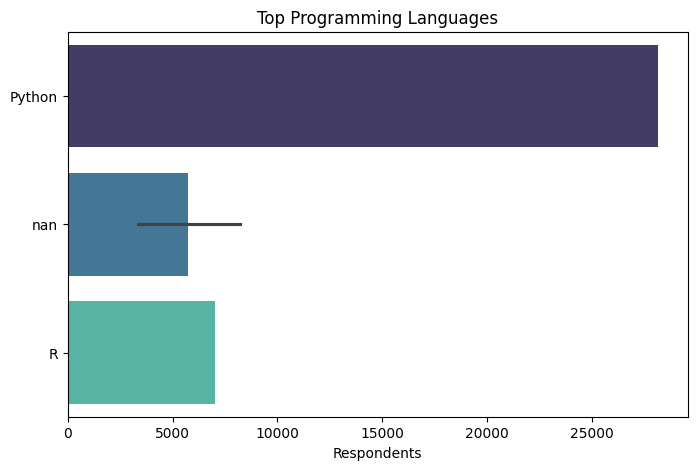

In [43]:
lang_cols = [c for c in df.columns if c.startswith("Q7_Part_")]
top_langs = df[lang_cols].notna().sum().sort_values(ascending=False).head(10)
top_langs.index = [clean_label(columns_map[c]) for c in top_langs.index]

plt.figure(figsize=(8,5))
sns.barplot(x=top_langs.values, y=top_langs.index, palette="mako")
plt.title("Top Programming Languages")
plt.xlabel("Respondents")
plt.ylabel("")
plt.show()

##Top IDEs\TOOLS

/tmp/ipython-input-3565492351.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ides.values, y=top_ides.index, palette="crest")


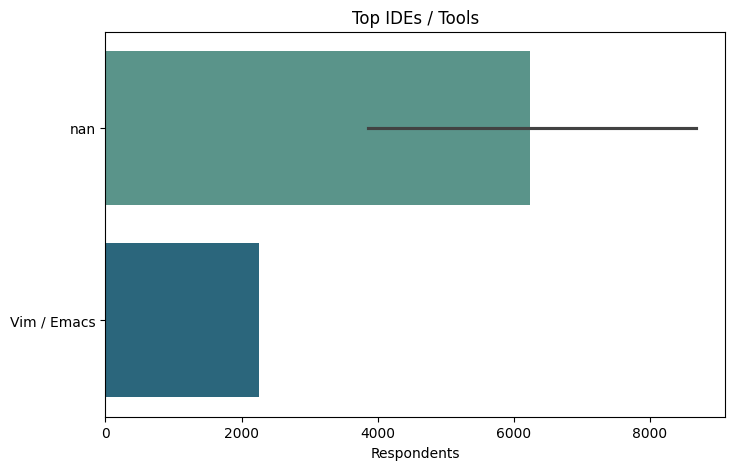

In [44]:
ide_cols = [c for c in df.columns if c.startswith("Q9_Part_")]
if len(ide_cols) > 0:
    top_ides = df[ide_cols].notna().sum().sort_values(ascending=False).head(10)
    top_ides.index = [clean_label(columns_map[c]) for c in top_ides.index]

    plt.figure(figsize=(8,5))
    sns.barplot(x=top_ides.values, y=top_ides.index, palette="crest")
    plt.title("Top IDEs / Tools")
    plt.xlabel("Respondents")
    plt.ylabel("")
    plt.show()

##Top Cloud Platforms

/tmp/ipython-input-1159963983.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cloud.values, y=top_cloud.index, palette="rocket")


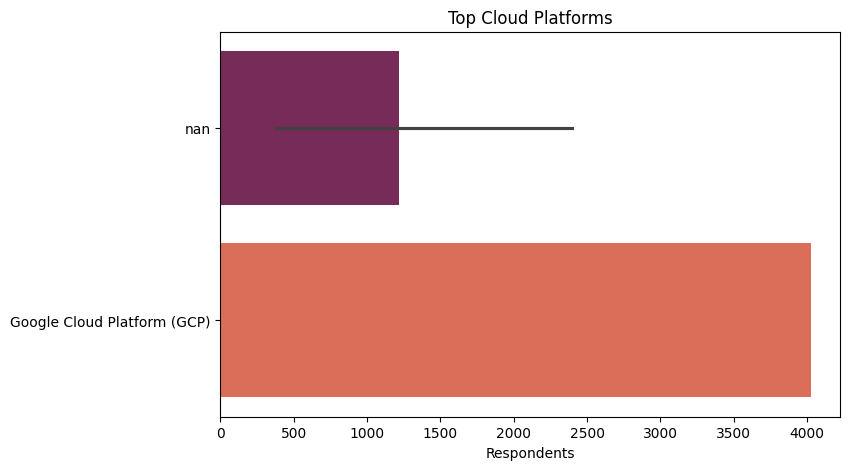

In [45]:
cloud_cols = [c for c in df.columns if c.startswith("Q27_A_Part_")]
if len(cloud_cols) > 0:
    top_cloud = df[cloud_cols].notna().sum().sort_values(ascending=False).head(10)
    top_cloud.index = [clean_label(columns_map[c]) for c in top_cloud.index]

    plt.figure(figsize=(8,5))
    sns.barplot(x=top_cloud.values, y=top_cloud.index, palette="rocket")
    plt.title("Top Cloud Platforms")
    plt.xlabel("Respondents")
    plt.ylabel("")
    plt.show()

##Job Role vs Education Level


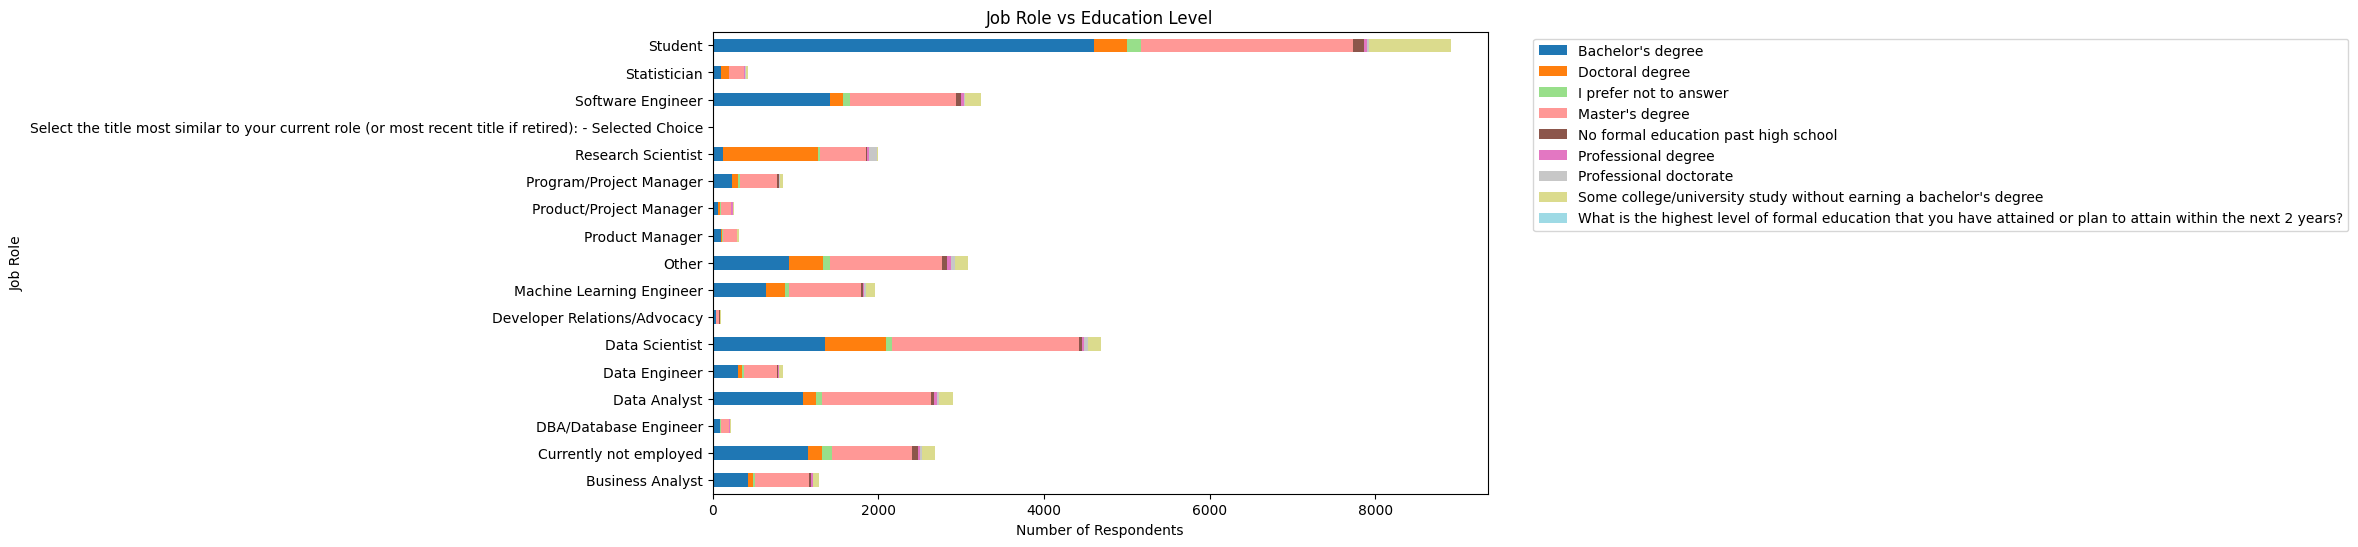

In [34]:
if "Q4" in df.columns and "Q5" in df.columns:
    edu_role = pd.crosstab(df["Q5"], df["Q4"])
    edu_role.plot(kind="barh", stacked=True, figsize=(10,6), colormap="tab20")
    plt.title("Job Role vs Education Level")
    plt.xlabel("Number of Respondents")
    plt.ylabel("Job Role")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


##Top Countries of Respondents

/tmp/ipython-input-519840530.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette="viridis")


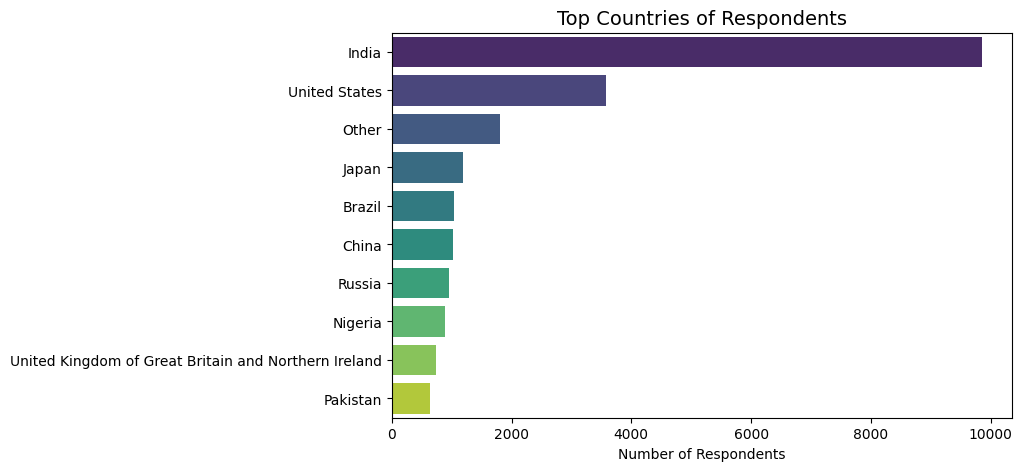

In [36]:

if "Q3" in df.columns:
    plot_top_counts(df["Q3"], "Top Countries of Respondents", "Number of Respondents", topn=10)